# Get Data from csv files

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


account = pd.read_csv("../data/raw/account.csv", sep=";")
card = pd.read_csv("../data/raw/card_dev.csv", sep=";")
client = pd.read_csv("../data/raw/client.csv", sep=";")
disposition = pd.read_csv("../data/raw/disp.csv", sep=";")
demograph = pd.read_csv("../data/raw/district.csv",sep=";")
loan = pd.read_csv("../data/raw/loan_dev.csv", sep=";")
transactions = pd.read_csv("../data/raw/trans_dev.csv",sep=";", low_memory=False)

# Merge Data

In [4]:
account_demograph = pd.merge(account, demograph, left_on="district_id", right_on="code ").drop("code ", axis=1)
loan_demograph = pd.merge(account_demograph, loan, on="account_id")

# Graphics
### Histogram (Loan Amount)

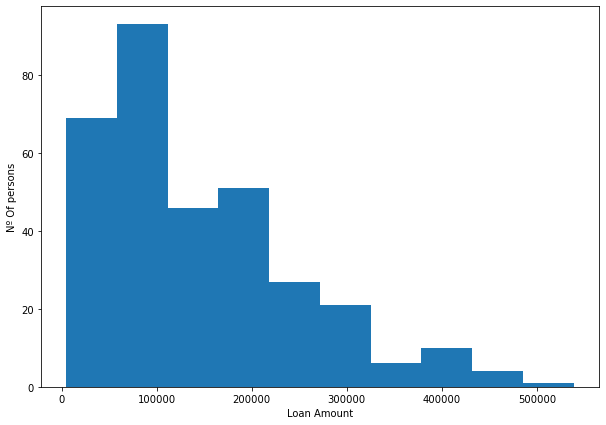

In [3]:
plt.figure(figsize=(10, 7))

plt.xlabel('Loan Amount')
plt.ylabel('Nº Of Clients')
loan_amount = plt.hist(loan['amount'])
plt.show()

### Scatter Plot

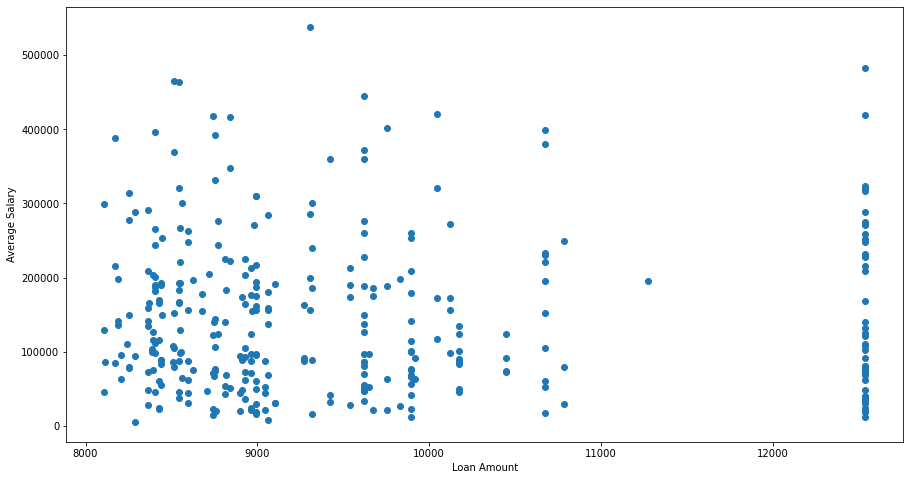

In [4]:
plt.figure(figsize=(15, 8))

plt.xlabel('Loan Amount')
plt.ylabel('Average Salary')
salary_amount = plt.scatter(x=loan_demograph["average salary "], y=loan_demograph["amount"],)
plt.show()

### Bar Plot

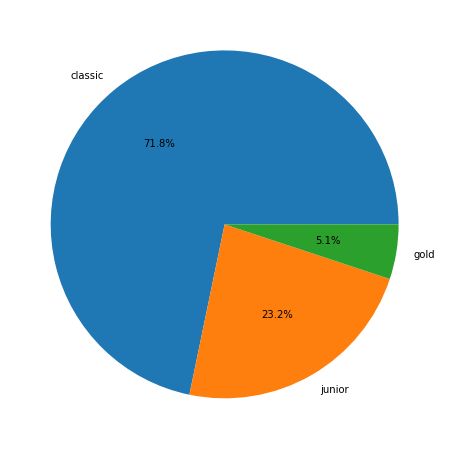

"           \nplt.xlabel('Card Types')\nplt.ylabel('Nº clients')            \nplt.bar(dic.keys(), dic.values())\nplt.show()\n"

In [5]:
dic = {}

for type in card["type"]:
    if type == "junior": 
        if type not in dic.keys():
            dic['junior'] = 1
        else:
            dic['junior'] += 1
    if type == "classic":
        if type not in dic.keys():
            dic['classic'] = 1
        else:
            dic['classic'] += 1
    if type == "gold":
        if type not in dic.keys():
            dic['gold'] = 1
        else:
            dic['gold'] += 1

            
plt.figure(figsize=(10, 8))
plt.pie(dic.values(), labels = dic.keys(), autopct='%1.1f%%')
plt.show()

'''           
plt.xlabel('Card Types')
plt.ylabel('Nº clients')            
plt.bar(dic.keys(), dic.values())
plt.show()
'''

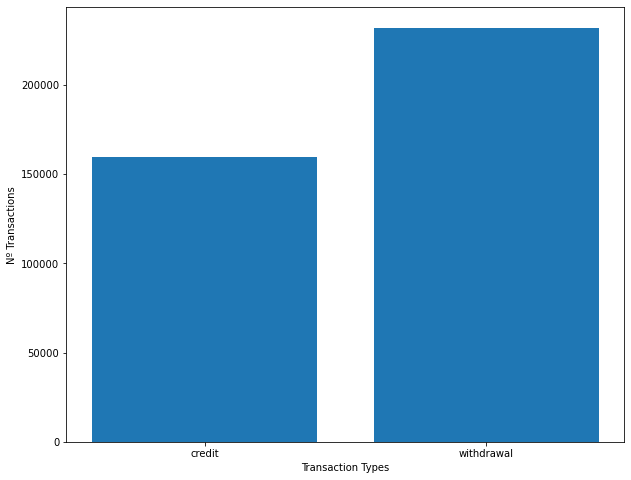

In [6]:
dic = {}

for type in transactions["type"]:
    if type == "credit": 
        if type not in dic.keys():
            dic['credit'] = 1
        else:
            dic['credit'] += 1
    if type == "withdrawal":
        if type not in dic.keys():
            dic['withdrawal'] = 1
        else:
            dic['withdrawal'] += 1
            

plt.figure(figsize=(10, 8))
            
plt.xlabel('Transaction Types')
plt.ylabel('Nº Transactions')            
plt.bar(dic.keys(), dic.values())
plt.show()            

### Correlation Matrix

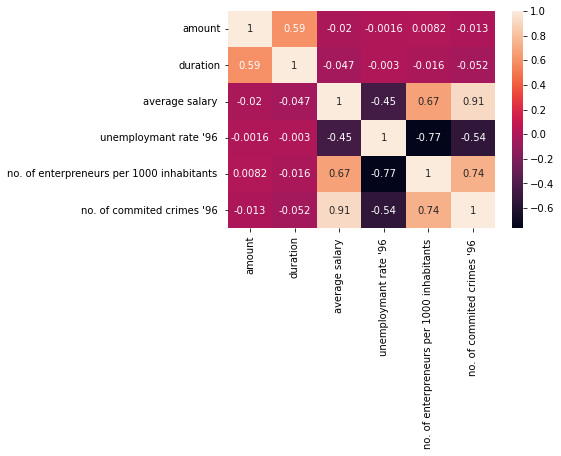

In [7]:
corr_matrix = loan_demograph[["amount", "duration", "average salary ", "unemploymant rate '95 ", "unemploymant rate '96 ", "no. of enterpreneurs per 1000 inhabitants ", "no. of commited crimes '95 ", "no. of commited crimes '96 "]].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

plot_corr = sns.heatmap(corr_matrix, annot=True)

## Missing Values

### Account Table Missing Values

In [8]:
print(account.isnull().sum() / len(account))

account_id     0.0
district_id    0.0
frequency      0.0
date           0.0
dtype: float64


### Card_dev Table Missing Values

In [9]:
print(card.isnull().sum() / len(card))

card_id    0.0
disp_id    0.0
type       0.0
issued     0.0
dtype: float64


### Client Table Missing Values

In [10]:
print(client.isnull().sum() / len(client))

client_id       0.0
birth_number    0.0
district_id     0.0
dtype: float64


### Disp Table Missing Values

In [11]:
print(disposition.isnull().sum() / len(disposition))

disp_id       0.0
client_id     0.0
account_id    0.0
type          0.0
dtype: float64


### District Table Missing Values

In [12]:
print(demograph.isnull().sum() / len(demograph))

code                                                 0.0
name                                                 0.0
region                                               0.0
no. of inhabitants                                   0.0
no. of municipalities with inhabitants < 499         0.0
no. of municipalities with inhabitants 500-1999      0.0
no. of municipalities with inhabitants 2000-9999     0.0
no. of municipalities with inhabitants >10000        0.0
no. of cities                                        0.0
ratio of urban inhabitants                           0.0
average salary                                       0.0
unemploymant rate '95                                0.0
unemploymant rate '96                                0.0
no. of enterpreneurs per 1000 inhabitants            0.0
no. of commited crimes '95                           0.0
no. of commited crimes '96                           0.0
dtype: float64


### Loan_dev Table Missing Values

In [13]:
print(loan.isnull().sum() / len(loan))

loan_id       0.0
account_id    0.0
date          0.0
amount        0.0
duration      0.0
payments      0.0
status        0.0
dtype: float64


### Trans_dev Table Missing Values

In [14]:
print(transactions.isnull().sum() / len(transactions))

trans_id      0.000000
account_id    0.000000
date          0.000000
type          0.000000
operation     0.178381
amount        0.000000
balance       0.000000
k_symbol      0.466980
bank          0.754863
account       0.742292
dtype: float64
